In [1047]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import GridSearchCV
import warnings


In [1048]:
warnings.filterwarnings("ignore")

In [1049]:
df_test = pd.read_csv('/content/customer_seg_test.csv')
df_train = pd.read_csv('/content/customer_seg_train.csv')

In [1050]:
df_test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [1051]:
df_train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [1052]:
x = df_test.drop(columns = ['Segmentation'])
y = df_test['Segmentation']


In [1053]:
x_train = df_train.drop(columns = ['Segmentation'])
y_train = df_train['Segmentation']

In [1054]:
x_train, x_val, y_train , y_val = train_test_split(df_train.drop('Segmentation', axis=1), df_train['Segmentation'], test_size=0.3, random_state=90, stratify=df_train['Segmentation'])

In [1055]:
x.columns


Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [1056]:
x_train.Age.replace(np.nan, x_train.Age.mean(), inplace = True)
x_train.Work_Experience.replace(np.nan, x_train.Work_Experience.mean(), inplace = True)
x_train.Family_Size.replace(np.nan, x_train.Family_Size.mean(), inplace = True)


In [1057]:
x.Work_Experience.replace(np.nan, x.Work_Experience.mean(), inplace = True)
x.Family_Size.replace(np.nan, x.Family_Size.mean(), inplace = True)


In [1058]:
x_val.Work_Experience.replace(np.nan, x_val.Work_Experience.mean(), inplace = True)
x_val.Family_Size.replace(np.nan, x_val.Family_Size.mean(), inplace = True)

In [1059]:
cat_imputer = SimpleImputer(strategy='constant', fill_value='unknown')

cat_imputer.fit(x_train[['Ever_Married', 'Graduated', 'Profession', 'Var_1']])
x_train[['Ever_Married', 'Graduated', 'Profession', 'Var_1']] = cat_imputer.transform(x_train[['Ever_Married', 'Graduated', 'Profession', 'Var_1']])

In [1060]:
cat_imputer = SimpleImputer(strategy='constant', fill_value='unknown')

cat_imputer.fit(x[['Ever_Married', 'Graduated', 'Profession', 'Var_1']])
x[['Ever_Married', 'Graduated', 'Profession', 'Var_1']] = cat_imputer.transform(x[['Ever_Married', 'Graduated', 'Profession', 'Var_1']])

In [1061]:
cat_imputer = SimpleImputer(strategy='constant', fill_value='unknown')

cat_imputer.fit(x_val[['Ever_Married', 'Graduated', 'Profession', 'Var_1']])
x_val[['Ever_Married', 'Graduated', 'Profession', 'Var_1']] = cat_imputer.transform(x_val[['Ever_Married', 'Graduated', 'Profession', 'Var_1']])

In [1062]:
x_train.drop(['Var_1','ID'], axis=1,  inplace = True)

In [1063]:
x.drop(['Var_1','ID'], axis=1,  inplace = True)

In [1064]:
x_val.drop(['Var_1','ID'], axis=1,  inplace = True)

In [1065]:
print(f"Shape before encoding: {x_train.shape}")
x_train = pd.get_dummies(x_train, dtype=int)
x = pd.get_dummies(x, dtype=int)
x_val = pd.get_dummies(x_val, dtype=int)
print(f"Shape before encoding: {x_train.shape}")
x_train

Shape before encoding: (5647, 8)
Shape before encoding: (5647, 24)


,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Ever_Married_unknown,Graduated_No,Graduated_Yes,...,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Profession_unknown,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
2695,46,0.000000,2.0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2313,23,0.000000,8.0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4620,83,0.000000,7.0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
6480,43,8.000000,2.0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3822,27,8.000000,1.0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,49,0.000000,1.0,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
339,46,8.000000,2.0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7017,21,2.634059,1.0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3614,40,8.000000,5.0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [1066]:
#onehotencoder = OneHotEncoder(sparse_output = False)

#encoded_df = pd.DataFrame(onehotencoder.fit_transform(x_train[['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score']]))
#encoded_df.columns = onehotencoder.get_feature_names_out()
#encoded_df

In [1067]:
#x_train = x_train.join(encoded_df) # let us join the encoded variable
#x_train
#x_train.drop(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score'], axis = 1, inplace = True)

In [1068]:
#x = x.join(encoded_df) # let us join the encoded variable
#x
#x.drop(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score'], axis = 1, inplace = True)

In [1069]:
#x_val = x_val.join(encoded_df) # let us join the encoded variable
#x_val
#x_val.drop(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score'], axis = 1, inplace = True)

Text(0.5, 1.0, 'Family_Size\xa0outliers')

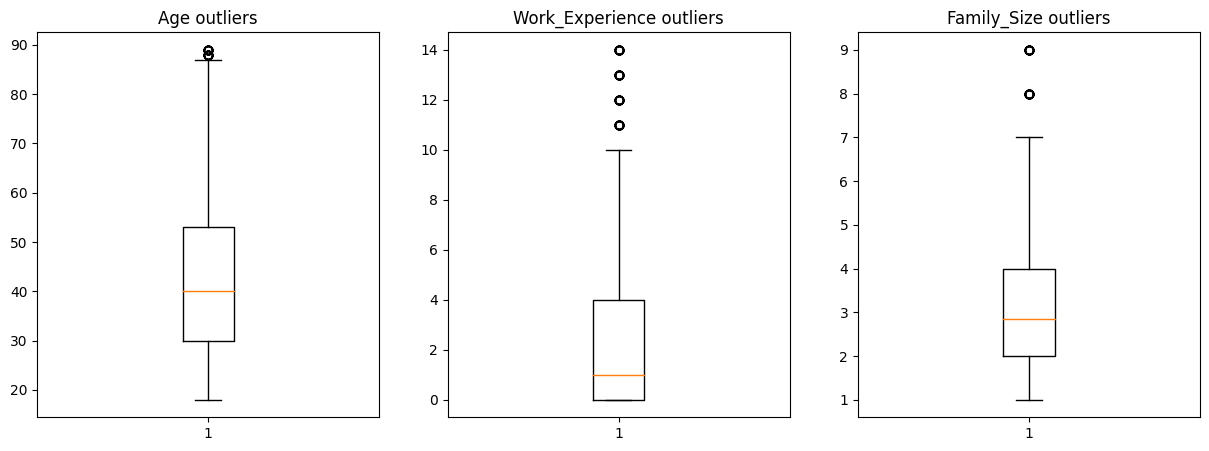

In [1070]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].boxplot(x=x_train['Age'])
axes[0].set_title("Age outliers")

axes[1].boxplot(x=x_train['Work_Experience'])
axes[1].set_title("Work_Experience outliers")

axes[2].boxplot(x=x_train['Family_Size'])
axes[2].set_title("Family_Size outliers")

In [1071]:
#find the boundaries of 1.5 * IQR for each column
X_outliers = x_train.loc[:, ['Age', 'Work_Experience', 'Family_Size']]
Q1 = X_outliers.quantile(0.25)
Q3 = X_outliers.quantile(0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR # didn't take lower cos there are no outliers

print(upper)

Age                87.5
Work_Experience    10.0
Family_Size         7.0
dtype: float64


In [1072]:
# mask for the train dataframe
masked_df = (X_outliers > upper)
mask_out = masked_df.any(axis = 1)
max_values = X_outliers[~mask_out].max()

In [1073]:
def replace(name: str):
    print(x_train.loc[(x_train[name] > max_values[name]), name].shape)

    x_train.loc[(x_train[name] > max_values[name]), name] = max_values[name]

In [1074]:
replace("Age")

(53,)


In [1075]:
replace('Work_Experience')

(128,)


In [1076]:
replace('Family_Size')

(65,)


In [1077]:
x_train.shape

(5647, 24)

In [1078]:
y_train.shape

(5647,)

In [1079]:
#minmax_scale(x_train, axis=0)  # scale each column independently
#minmax_scale(x_train, axis=1)  # scale each row independently

In [1080]:
params = { "penalty" : ('l1', 'l2', 'elasticnet', 'none'),"solver": ("lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"),"max_iter" : [100, 1000, 2500],"C" : np.logspace(-4, 4, 20)}

In [1081]:
model = LogisticRegression()

In [1082]:
clf = GridSearchCV(model, params, cv=3, scoring='accuracy')
best_clf = clf.fit(x_val,y_val)
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [1083]:
print("Best: %f using %s" % (best_clf.best_score_, best_clf.best_params_))

Best: 0.502272 using {'C': 0.23357214690901212, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [1089]:
craft = LogisticRegression(C=0.23357214690901212, max_iter=100, penalty= 'l2', solver= 'liblinear')

In [1090]:
craft.fit(x_train, y_train)


LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [1092]:
y_pred = craft.predict(x)

In [1093]:
metrics.accuracy_score(y, y_pred)


0.3338408831366578

In [1094]:
from sklearn.ensemble import RandomForestClassifier

In [1115]:
rf=RandomForestClassifier(criterion='gini', n_estimators=800,
                             min_samples_split=10,min_samples_leaf=10,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)

In [1116]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_features='auto', min_samples_leaf=10,
                       min_samples_split=10, n_estimators=800, n_jobs=-1,
                       oob_score=True, random_state=1)

In [1117]:
y_pred_rf = rf.predict(x)

In [1118]:
metrics.accuracy_score(y, y_pred_rf)

0.3349828701941378